In [11]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import random

In [12]:
def make_fset(x, drop=True):
    if len(set(x.split(' '))) < 2:
        print(f"WARNING: Features for '{x}-{x}' (self-self PPI) detected ...")
        if drop == False:
            x1 = x.split(' ')[0]
            fset = frozenset({x1,x1})
            return(fset)
        else:
            return(None)
    else:
        x1 = x.split(' ')[0]
        x2 = x.split(' ')[1]
        fset = frozenset({x1,x2})
        return(fset)

In [13]:
ppi_file = '../ppi_ml/results/ppi_predict/feature_sweep/100/scored_interactions_fdr10_LinearSVC.csv'
annot_file = '../ppi_ml/annotations/leca_eunog_annots_complete.030721.csv'

In [14]:
df = pd.read_csv(ppi_file)

In [15]:
annots = pd.read_csv(annot_file)
id_dict = dict()
for i in range(len(annots)):
    og = annots['ID'][i]
    gene = annots['human_gene_names_primary'][i]
    if type(gene) == str:
        id_dict[og] = gene
    else:
        id_dict[og] = og

In [16]:
id_dict = dict()
for i in range(len(annots)):
    og = annots['ID'][i]
    gene = annots['human_gene_names_primary'][i]
    if type(gene) == str:
        n_genes = gene.split(', ')
        if len(n_genes) == 2:
            gene = ',\n'.join(n_genes[0:2])
        if len(n_genes) > 2:
            gene = ',\n'.join(n_genes[0:2]) + ' ...'
        id_dict[og] = gene
    else:
        id_dict[og] = og

In [144]:
annots_filt = annots[['ID', 'human_protein_names', 'human_function_cc', 'human_subcellular_location_cc']]
annots_filt = annots_filt.rename(columns={'ID':'ID1'})
annots_filt

,ID1,human_protein_names,human_function_cc,human_subcellular_location_cc
0,ENOG502QPHT,NaN,NaN,NaN
1,ENOG502QPHW,NaN,NaN,NaN
2,ENOG502QPHZ,NaN,NaN,NaN
3,ENOG502QPIA,"Secernin-3, Secernin-2",NaN,NaN
4,ENOG502QPIC,NaN,NaN,NaN
...,...,...,...,...
5983,KOG4845,NADH-ubiquinone oxidoreductase chain 4 (EC 7.1...,FUNCTION: Core subunit of the mitochondrial me...,SUBCELLULAR LOCATION: Mitochondrion inner memb...
5984,KOG4846,Nuclear receptor subfamily 1 group D member 1 ...,FUNCTION: Transcriptional repressor which coor...,SUBCELLULAR LOCATION: Nucleus {ECO:0000250|Uni...
5985,KOG4847,"IQCJ-SCHIP1 readthrough transcript protein, Sc...",FUNCTION: May play a role in action potential ...,"SUBCELLULAR LOCATION: Cell projection, axon {E..."
5986,KOG4849,Cleavage and polyadenylation specificity facto...,FUNCTION: Component of the cleavage factor Im ...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...


## Efhc1/2

In [98]:
og = 'KOG0043'
df_filt = df[df['ID'].str.contains(og)].reset_index(drop=True)
df_filt[['ID1', 'ID2']] = df_filt['ID'].str.split(' ', expand=True)
df_filt['gene1'] = [id_dict[i] for i in df_filt['ID1']]
df_filt['gene2'] = [id_dict[i] for i in df_filt['ID2']]
df_filt = df_filt.merge(annots_filt, how='left', left_on='ID1', right_on='ID1')
df_filt

,ID,ppi_score,set,ID1,ID2,gene1,gene2,human_protein_names,human_function_cc,human_subcellular_location_cc
0,ENOG502QT04 KOG0043,0.821241,predict,ENOG502QT04,KOG0043,ENOG502QT04,"EFHC2, EFHC1",NaN,NaN,NaN
1,KOG4044 KOG0043,0.671658,predict,KOG4044,KOG0043,"ISOC2, ISOC1","EFHC2, EFHC1","Isochorismatase domain-containing protein 2, I...",NaN,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...
2,KOG3961 KOG0043,0.607872,predict,KOG3961,KOG0043,"PACRGL, PACRG","EFHC2, EFHC1","PACRG-like protein, Parkin coregulated gene pr...","NA, FUNCTION: Suppresses cell death induced by...",NaN
3,KOG1695 KOG0043,0.592962,predict,KOG1695,KOG0043,"GSTA4, HPGDS, GSTA1, GSTA2, GSTP1, GSTM1, GSTM...","EFHC2, EFHC1",Glutathione S-transferase A4 (EC 2.5.1.18) (GS...,FUNCTION: Conjugation of reduced glutathione t...,"SUBCELLULAR LOCATION: Cytoplasm., SUBCELLULAR ..."
4,ENOG502QT8E KOG0043,0.565646,predict,ENOG502QT8E,KOG0043,ENKUR,"EFHC2, EFHC1",Enkurin,FUNCTION: Adapter that functions to localize a...,"SUBCELLULAR LOCATION: Cell projection, cilium,..."
5,ENOG502S497 KOG0043,0.533437,predict,ENOG502S497,KOG0043,ENOG502S497,"EFHC2, EFHC1",NaN,NaN,NaN
6,KOG4033 KOG0043,0.520467,predict,KOG4033,KOG0043,OSCP1,"EFHC2, EFHC1",Protein OSCP1 (hOSCP1) (Organic solute transpo...,FUNCTION: May be involved in drug clearance in...,SUBCELLULAR LOCATION: Basal cell membrane. Not...
7,KOG2368 KOG0043,0.520350,predict,KOG2368,KOG0043,"HMGCL, HMGCLL1","EFHC2, EFHC1","Hydroxymethylglutaryl-CoA lyase, mitochondrial...",FUNCTION: Mitochondrial 3-hydroxymethyl-3-meth...,SUBCELLULAR LOCATION: Mitochondrion matrix {EC...
8,KOG0145 KOG0043,0.500524,predict,KOG0145,KOG0043,"ELAVL4, ELAVL2, ELAVL3, ELAVL1","EFHC2, EFHC1",ELAV-like protein 4 (Hu-antigen D) (HuD) (Para...,FUNCTION: RNA-binding protein that is involved...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...
9,ENOG502QSAN KOG0043,0.488137,predict,ENOG502QSAN,KOG0043,ENOG502QSAN,"EFHC2, EFHC1",NaN,NaN,NaN


In [89]:
hits = df_filt['ID1'].tolist()
hits = ['KOG0043'] + hits
hits

['KOG0043',
 'ENOG502QT04',
 'KOG4044',
 'KOG3961',
 'KOG1695',
 'ENOG502QT8E',
 'ENOG502S497',
 'KOG4033',
 'KOG2368',
 'KOG0145',
 'ENOG502QSAN',
 'KOG0074',
 'KOG2927',
 'KOG4070']

In [90]:
with open('../ppi_ml/results/cmplx_files/special_cases/efhc12.txt', 'w') as f:
    f.write('\n'.join(map(str, hits)))

In [99]:
df_filt.to_csv('../ppi_ml/results/cmplx_files/efhc12_ppis_annotated.csv')

In [109]:
all_ppis = [frozenset({i, j}) for i,j in list(combinations(hits, 2))]
df['fs'] = [make_fset(i, drop=True) for i in df['ID']]
ppi_nx = df[df['fs'].isin(all_ppis)].reset_index(drop=True)

In [110]:
ppi_nx

,ID,ppi_score,set,fs
0,KOG0074 KOG4044,0.890806,predict,"(KOG0074, KOG4044)"
1,ENOG502QT04 KOG0043,0.821241,predict,"(ENOG502QT04, KOG0043)"
2,KOG0074 KOG1695,0.749632,predict,"(KOG0074, KOG1695)"
3,KOG1695 KOG4044,0.732292,predict,"(KOG1695, KOG4044)"
4,KOG4044 KOG0145,0.691428,predict,"(KOG0145, KOG4044)"
5,KOG2368 KOG4044,0.675162,predict,"(KOG2368, KOG4044)"
6,KOG4044 KOG0043,0.671658,predict,"(KOG0043, KOG4044)"
7,KOG4033 KOG4044,0.629386,predict,"(KOG4033, KOG4044)"
8,ENOG502QSAN ENOG502QT04,0.615496,predict,"(ENOG502QT04, ENOG502QSAN)"
9,KOG3961 KOG0043,0.607872,predict,"(KOG0043, KOG3961)"


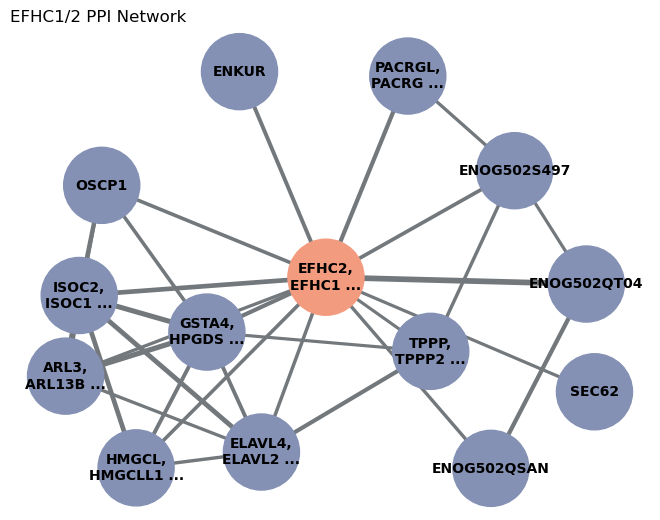

In [129]:
colors = ["#4DBBD5", "#E64B35", "#00A087", "#3C5488", "#F39B7F", "#8491B4", "#91D1C2", "#DC0000", "#7E6148", "#B09C85"]
protein_network = nx.Graph()
# add nodes with color attribute (discrete variable)
for i in hits:
    color = [colors[4] if i == 'KOG0043' else colors[5]][0]
    gene = id_dict[i] 
    protein_network.add_node(gene, color=color)

# add edges with thickness attribute (continuous variable)
for i in range(len(ppi_nx)):
    p1 =  list(ppi_nx['fs'][i])[0]
    gene1 = id_dict[p1]
    p2 =  list(ppi_nx['fs'][i])[1]
    gene2 = id_dict[p2]
    weight = ppi_nx['ppi_score'][i]
    protein_network.add_edge(gene1, gene2, thickness=weight*5)

# extract node colors and edge thickness attributes
node_colors = [protein_network.nodes[node]["color"] for node in protein_network.nodes()]
edge_thickness = [protein_network.edges[edge]["thickness"] for edge in protein_network.edges()]

# draw the network using NetworkX with custom attributes
#pos = nx.arf_layout(protein_network)
#pos = nx.circular_layout(protein_network)
pos = nx.kamada_kawai_layout(protein_network)
nx.draw(protein_network, pos, with_labels=True, node_size=3000, font_size=10, font_weight="bold", edge_color="#73787C", node_color=node_colors, width=edge_thickness)

# add title
plt.title('EFHC1/2 PPI Network', loc="left")

# save figure
plt.savefig(f"../ppi_ml/figures/efhc12_network.png", dpi=300)
plt.savefig(f"../ppi_ml/figures/efhc12_network.pdf", dpi=300)

# show the plot
plt.show()

## Atp6v1a

In [47]:
file = '../ppi_ml/highlights/atp6v1a/atp6v1a.csv'
df = pd.read_csv(file)
df_nx = pd.read_csv(ppi_file)

In [48]:
all_nogs = df['ID'].to_list()
ogs2filter = ['KOG0061','KOG2195']
[all_nogs.remove(i) for i in ogs2filter]
all_ppis = [frozenset({i, j}) for i,j in list(combinations(all_nogs, 2))]
len(all_ppis)

105

In [49]:
df_nx['fs'] = [make_fset(i) for i in df_nx['ID']]
target_nx = df_nx[df_nx['fs'].isin(all_ppis)].reset_index(drop=True)

In [50]:
# set up label dict for node colors
colors = ["#E64B35", "#4DBBD5", "#00A087", "#3C5488"]
cols = ['status', 'label']
df['plot_label'] = df[cols].apply(lambda x: ' '.join(x.values.astype(str)), axis=1)
df['grp_idx'] = df.groupby('plot_label').ngroup()
df['color'] = [colors[i] for i in df['grp_idx']]

color_dict = {}
label_dict = {}
for i in range(len(df)):
    if df['ID'][i] not in color_dict:
        color_dict[df['ID'][i]] = df['color'][i]
    if df['ID'][i] not in label_dict:
        label_dict[df['ID'][i]] = df['plot_label'][i]

In [51]:
protein_network = nx.Graph()
# add nodes with color attribute (discrete variable)
for i in all_nogs:
    color = color_dict[i]
    gene = id_dict[i] 
    protein_network.add_node(gene, color=color)

# add edges with thickness attribute (continuous variable)
for i in range(len(target_nx)):
    p1 =  list(target_nx['fs'][i])[0]
    gene1 = id_dict[p1]
    p2 =  list(target_nx['fs'][i])[1]
    gene2 = id_dict[p2]
    weight = target_nx['ppi_score'][i]
    color = ["black" if label_dict[p1]=='Known Osteopetrosis' or label_dict[p2]=='Known Osteopetrosis' else '#73787C']
    protein_network.add_edge(gene1, gene2, thickness=weight*1.5, color=color[0])

# extract node colors and edge thickness attributes
node_colors = [protein_network.nodes[node]["color"] for node in protein_network.nodes()]
edge_thickness = [protein_network.edges[edge]["thickness"] for edge in protein_network.edges()]
edge_colors = [protein_network.edges[edge]["color"] for edge in protein_network.edges()]

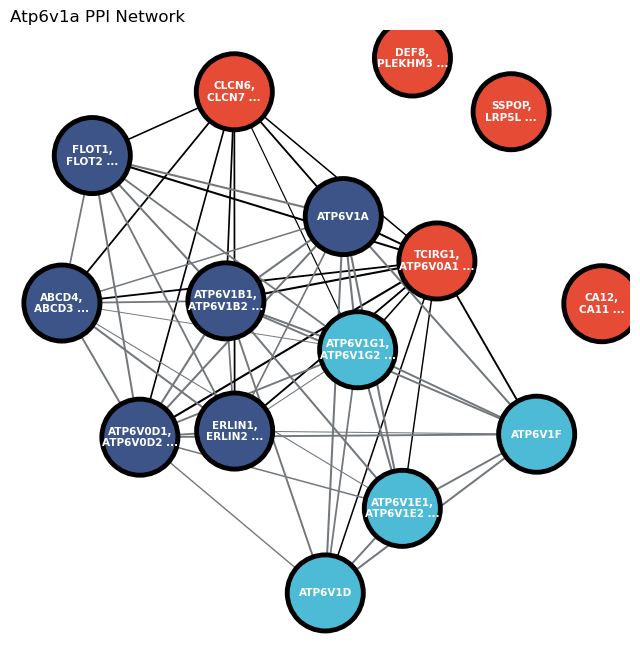

In [52]:
random.seed(67)
plt.figure(figsize=(8, 8))

# draw the network using NetworkX with custom attributes
#pos = nx.arf_layout(protein_network)
#pos = nx.circular_layout(protein_network)
pos = nx.kamada_kawai_layout(protein_network)

nx.draw_networkx_nodes(
    protein_network, pos,
    node_color=node_colors,  # Use the original node colors
    node_size=3000,  # Use the original node size
    node_shape="o",  # Node shape (circle)
    alpha=1,
    linewidths=3.5,
    edgecolors="black",
)

nx.draw(
    protein_network, pos, 
    with_labels=True, font_size=7.5, 
    font_color="white", font_weight="bold", 
    edge_color=edge_colors, node_color=node_colors, 
    width=edge_thickness)

# add title
plt.title('Atp6v1a PPI Network', loc="left")

# save figure
plt.savefig(f"../ppi_ml/highlights/atp6v1a/atp6v1a_network.png", dpi=300)
plt.savefig(f"../ppi_ml/highlights/atp6v1a/atp6v1a_network.pdf", dpi=300)

# show the plot
plt.show()

In [53]:
edge_colors

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C',
 '#73787C']

## Glg1 + IFT-A, IFT-B

In [30]:
og = 'KOG3648'
df_filt = df[df['ID'].str.contains(og)].reset_index(drop=True)
df_filt[['ID1', 'ID2']] = df_filt['ID'].str.split(' ', expand=True)
for i in range(len(df_filt)):
    id1 = df_filt['ID1'][i]
    id2 = df_filt['ID2'][i]
    if id1 == og:
        df_filt['ID1'][i] = id2
        df_filt['ID2'][i] = id1
df_filt['gene1'] = [id_dict[i] for i in df_filt['ID1']]
df_filt['gene2'] = [id_dict[i] for i in df_filt['ID2']]
df_filt = df_filt.merge(annots_filt, how='left', left_on='ID1', right_on='ID1')
df_filt

/tmp/ipykernel_2722664/124722420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['ID1'][i] = id2
/tmp/ipykernel_2722664/124722420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['ID2'][i] = id1


,ID,ppi_score,set,fs,ID1,ID2,gene1,gene2,human_protein_names,human_function_cc,human_subcellular_location_cc
0,KOG3648 KOG0104,0.924369,predict,"(KOG0104, KOG3648)",KOG0104,KOG3648,HYOU1,GLG1,Hypoxia up-regulated protein 1 (150 kDa oxygen...,FUNCTION: Has a pivotal role in cytoprotective...,SUBCELLULAR LOCATION: Endoplasmic reticulum lu...
1,KOG1879 KOG3648,0.882325,predict,"(KOG3648, KOG1879)",KOG1879,KOG3648,"UGGT2,\nUGGT1 ...",GLG1,UDP-glucose:glycoprotein glucosyltransferase 2...,FUNCTION: Recognizes glycoproteins with minor ...,SUBCELLULAR LOCATION: Endoplasmic reticulum lu...
2,KOG3648 KOG4266,0.812767,predict,"(KOG4266, KOG3648)",KOG4266,KOG3648,MBTPS1,GLG1,Membrane-bound transcription factor site-1 pro...,FUNCTION: Serine protease that cleaves after h...,SUBCELLULAR LOCATION: Endoplasmic reticulum me...
3,KOG1242 KOG3648,0.664509,predict,"(KOG1242, KOG3648)",KOG1242,KOG3648,GCN1,GLG1,eIF-2-alpha kinase activator GCN1 (GCN1 eIF-2-...,FUNCTION: Acts as a positive activator of the ...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000250|U...
4,KOG3648 ENOG502QS4E,0.663333,predict,"(ENOG502QS4E, KOG3648)",ENOG502QS4E,KOG3648,IFT74,GLG1,Intraflagellar transport protein 74 homolog (C...,FUNCTION: Component of the intraflagellar tran...,"SUBCELLULAR LOCATION: Cell projection, cilium...."
5,ENOG502QQ65 KOG3648,0.661682,predict,"(ENOG502QQ65, KOG3648)",ENOG502QQ65,KOG3648,RNF213,GLG1,E3 ubiquitin-protein ligase RNF213 (EC 2.3.2.2...,FUNCTION: E3 ubiquitin-protein ligase involved...,"SUBCELLULAR LOCATION: Cytoplasm, cytosol {ECO:..."
6,KOG2292 KOG3648,0.658108,predict,"(KOG3648, KOG2292)",KOG2292,KOG3648,"STT3A,\nSTT3B ...",GLG1,Dolichyl-diphosphooligosaccharide--protein gly...,FUNCTION: Catalytic subunit of the oligosaccha...,SUBCELLULAR LOCATION: Endoplasmic reticulum {E...
7,KOG3809 KOG3648,0.651588,predict,"(KOG3809, KOG3648)",KOG3809,KOG3648,TRAF3IP1,GLG1,TRAF3-interacting protein 1 (Interleukin-13 re...,FUNCTION: Plays an inhibitory role on IL13 sig...,"SUBCELLULAR LOCATION: Cytoplasm, cytoskeleton ..."
8,KOG3648 KOG3595,0.646319,predict,"(KOG3595, KOG3648)",KOG3595,KOG3648,"DNAH14,\nDYNC1H1 ...",GLG1,Dynein axonemal heavy chain 14 (Axonemal beta ...,FUNCTION: Force generating protein of respirat...,"SUBCELLULAR LOCATION: Cytoplasm, cytoskeleton,..."
9,KOG3648 KOG4108,0.625507,predict,"(KOG4108, KOG3648)",KOG4108,KOG3648,"DYNLT4,\nDYNLT2 ...",GLG1,Dynein light chain Tctex-type 4 (Protein N22.1...,"NA, FUNCTION: May be an accessory component of...","SUBCELLULAR LOCATION: Cell projection, cilium,..."


In [25]:
hits = df_filt['ID1'].tolist()
hits = [og] + hits
hits

['KOG3648',
 'KOG3648',
 'KOG1879',
 'KOG3648',
 'KOG1242',
 'KOG3648',
 'ENOG502QQ65',
 'KOG2292',
 'KOG3809',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG2657',
 'KOG1524',
 'KOG3648',
 'KOG3648',
 'KOG0914',
 'KOG1134',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG2407',
 'KOG3648',
 'KOG3648',
 'KOG1278',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG2001',
 'KOG3648',
 'KOG3648',
 'KOG1631',
 'KOG0020',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG2106',
 'KOG2103',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG0439',
 'KOG3648',
 'KOG3648',
 'KOG0373',
 'KOG3648',
 'KOG1563',
 'KOG3473',
 'ENOG502RXD4',
 'KOG1691',
 'KOG3648',
 'KOG3648',
 'KOG3648',
 'KOG1043']

In [10]:
with open('../ppi_ml/results/cmplx_files/special_cases/glg1.txt', 'w') as f:
    f.write('\n'.join(map(str, hits)))

In [31]:
df_filt.to_csv('../ppi_ml/results/cmplx_files/glg1_ppis_annotated.csv', index=False)

In [12]:
all_ppis = [frozenset({i, j}) for i,j in list(combinations(hits, 2))]
df['fs'] = [make_fset(i, drop=True) for i in df['ID']]
ppi_nx = df[df['fs'].isin(all_ppis)].reset_index(drop=True)

In [15]:
ppi_nx

,ID,ppi_score,set,fs
0,KOG2407 KOG2292,0.997503,predict,"(KOG2407, KOG2292)"
1,KOG1278 KOG2292,0.989086,predict,"(KOG1278, KOG2292)"
2,KOG1278 KOG2407,0.980211,predict,"(KOG1278, KOG2407)"
3,KOG0020 KOG1879,0.958821,train,"(KOG0020, KOG1879)"
4,KOG1278 KOG1691,0.951103,predict,"(KOG1691, KOG1278)"
...,...,...,...,...
88,KOG0914 KOG2103,0.448116,predict,"(KOG0914, KOG2103)"
89,ENOG502QQ65 KOG3809,0.447040,predict,"(ENOG502QQ65, KOG3809)"
90,KOG0914 KOG1043,0.441636,predict,"(KOG0914, KOG1043)"
91,KOG1043 KOG3648,0.439483,predict,"(KOG3648, KOG1043)"


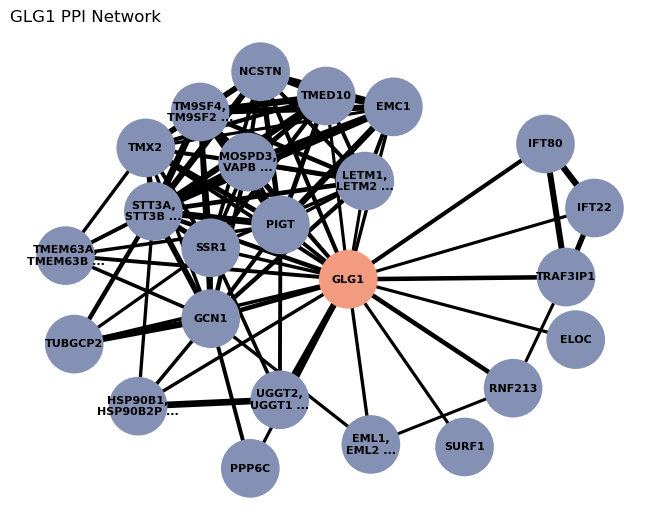

In [23]:
colors = ["#4DBBD5", "#E64B35", "#00A087", "#3C5488", "#F39B7F", "#8491B4", "#91D1C2", "#DC0000", "#7E6148", "#B09C85"]
protein_network = nx.Graph()
# add nodes with color attribute (discrete variable)
for i in hits:
    color = [colors[4] if i == og else colors[5]][0]
    gene = id_dict[i] 
    protein_network.add_node(gene, color=color)

# add edges with thickness attribute (continuous variable)
for i in range(len(ppi_nx)):
    p1 =  list(ppi_nx['fs'][i])[0]
    gene1 = id_dict[p1]
    p2 =  list(ppi_nx['fs'][i])[1]
    gene2 = id_dict[p2]
    weight = ppi_nx['ppi_score'][i]
    protein_network.add_edge(gene1, gene2, thickness=weight*5)

# extract node colors and edge thickness attributes
node_colors = [protein_network.nodes[node]["color"] for node in protein_network.nodes()]
edge_thickness = [protein_network.edges[edge]["thickness"] for edge in protein_network.edges()]

# draw the network using NetworkX with custom attributes
#pos = nx.arf_layout(protein_network)
#pos = nx.circular_layout(protein_network)
pos = nx.kamada_kawai_layout(protein_network)
nx.draw(
    protein_network, pos, with_labels=True, 
    node_color=node_colors, node_size=1500, node_shape="o", linewidths=3.5, alpha=1,
    font_size=8, font_weight="bold", 
    edge_color="black", width=edge_thickness)

# add title
plt.title('GLG1 PPI Network', loc="left")

# save figure
plt.savefig(f"../ppi_ml/figures/glg1_network.png", dpi=300)
plt.savefig(f"../ppi_ml/figures/glg1_network.pdf", dpi=300)

# show the plot
plt.show()

# SRTD PPIs

In [1]:
from datetime import datetime as dt
date = dt.today().strftime("%m%d%Y")

In [27]:
file = '../ppi_ml/highlights/glg1_srtd/srtd_ppis_annotated.csv'
df = pd.read_csv(file)
df_nx = pd.read_csv(ppi_file)

In [28]:
all_nogs = df['ID'].to_list()
#ogs2filter = ['KOG0061','KOG2195']
#[all_nogs.remove(i) for i in ogs2filter]
all_ppis = [frozenset({i, j}) for i,j in list(combinations(all_nogs, 2))]
len(all_ppis)

435

In [34]:
df_nx['fs'] = [make_fset(i) for i in df_nx['ID']]
target_nx = df_nx[df_nx['fs'].isin(all_ppis)].reset_index(drop=True)

# KEY:
* BLUE = IFT-B
* PURPLE = IFT-A
* GREEN = cDynein
* GREY = Other
* shape = known/predicted?

In [44]:
# set up label dict for node colors
#colors = ["#E64B35", "#4DBBD5", "#00A087", "#3C5488"]
#colors = ["#4DBBD5", "#B435E3", "#5A35E3", "#4BD2AC"]
colors = ["#5A35E3", "#B435E3", "#73787C", "#4BD2AC"]
cols = ['status', 'label']
df['grp_idx'] = df.groupby('label').ngroup()
df['color'] = [colors[i] for i in df['grp_idx']]

color_dict = {}
label_dict = {}
for i in range(len(df)):
    if df['ID'][i] not in color_dict:
        color_dict[df['ID'][i]] = df['color'][i]
    if df['ID'][i] not in label_dict:
        label_dict[df['ID'][i]] = df['status'][i]

In [45]:
protein_network = nx.Graph()
# add nodes with color attribute (discrete variable)
for i in all_nogs:
    color = color_dict[i]
    gene = id_dict[i] 
    protein_network.add_node(gene, color=color)

# add edges with thickness attribute (continuous variable)
for i in range(len(target_nx)):
    p1 =  list(target_nx['fs'][i])[0]
    gene1 = id_dict[p1]
    p2 =  list(target_nx['fs'][i])[1]
    gene2 = id_dict[p2]
    weight = target_nx['ppi_score'][i]
    color = ["black" if label_dict[p1]=='Known' or label_dict[p2]=='Known' else '#73787C']
    protein_network.add_edge(gene1, gene2, thickness=weight*1.5, color=color[0])

# extract node colors and edge thickness attributes
node_colors = [protein_network.nodes[node]["color"] for node in protein_network.nodes()]
edge_thickness = [protein_network.edges[edge]["thickness"] for edge in protein_network.edges()]
edge_colors = [protein_network.edges[edge]["color"] for edge in protein_network.edges()]

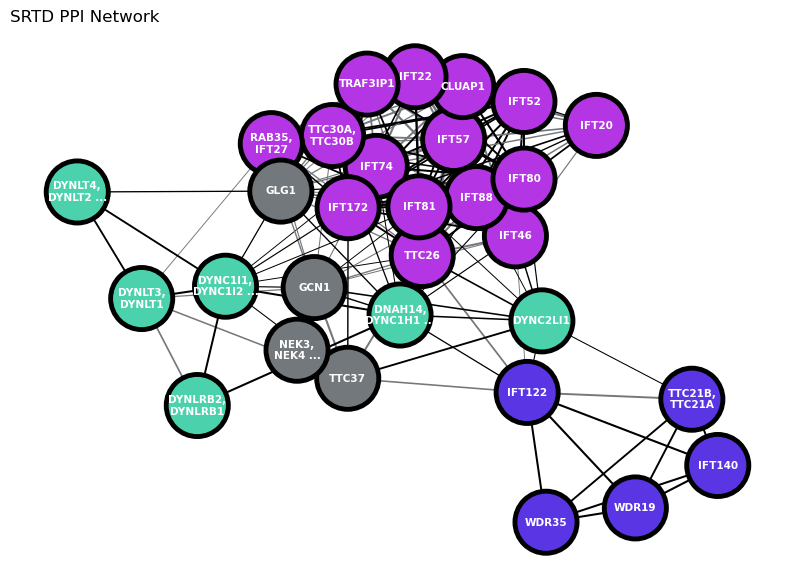

In [59]:
random.seed(13)
plt.figure(figsize=(10, 7))

# draw the network using NetworkX with custom attributes
#pos = nx.arf_layout(protein_network)
#pos = nx.circular_layout(protein_network)
pos = nx.kamada_kawai_layout(protein_network)

nx.draw_networkx_nodes(
    protein_network, pos,
    node_color=node_colors,  # Use the original node colors
    node_size=2000,  # Use the original node size
    node_shape="o",  # Node shape (circle)
    alpha=1,
    linewidths=3.5,
    edgecolors="black",
)

nx.draw(
    protein_network, pos, 
    with_labels=True, font_size=7.5, 
    font_color="white", font_weight="bold", 
    edge_color=edge_colors, node_color=node_colors, 
    width=edge_thickness)

# add title
plt.title('SRTD PPI Network', loc="left")

# save figure
plt.savefig(f"../ppi_ml/highlights/glg1_srtd/srtd_network_{date}.png", dpi=300)
plt.savefig(f"../ppi_ml/highlights/glg1_srtd/srtd_network_{date}.pdf", dpi=300)

# show the plot
plt.show()

In [ ]:
# ift-a = color_1, ift-b = color_2, non-IFT = color_3
# 
# known SRTD = solid line (or half black?)
# glg1 = bright purple --> line to **show top non-IFT prediction**

In [ ]:
df.groupby(['label', 'color']).size()

label    color  
IFT-A    #000629     5
IFT-B    #B435E3    15
Other    #5A35E3     4
cDynein  #4BD2AC     6
dtype: int64

In [20]:
# # SRTD annotations
# target_cols = ['ID','human_gene_names_primary','go_cmplx_name','corum_cmplx_name','cp_cmplx_name']
# target_annots = annots[target_cols]
# srtd_annots = df.merge(target_annots, how="left", left_on=['ID'], right_on=['ID'])
# srtd_annots.to_csv('../ppi_ml/highlights/glg1_srtd/srtd_ppis_annotated.csv', index=False)

,ID,human_gene_names_primary,go_cmplx_name,corum_cmplx_name,cp_cmplx_name
0,ENOG502QPHT,NaN,NaN,NaN,NaN
1,ENOG502QPHW,NaN,NaN,NaN,NaN
2,ENOG502QPHZ,NaN,NaN,NaN,NaN
3,ENOG502QPIA,"SCRN3, SCRN2",NaN,NaN,NaN
4,ENOG502QPIC,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5983,KOG4845,MT-ND4,mitochondrial respiratory chain complex I,Respiratory chain complex I (beta subunit) mit...,Mitochondrial respiratory chain complex I
5984,KOG4846,"NR1D1, NR1D2",chromatin,NaN,NaN
5985,KOG4847,"IQCJ-SCHIP1, SCHIP1",NaN,NaN,NaN
5986,KOG4849,"CPSF6, CPSF7","ribonucleoprotein complex, mRNA cleavage and p...","Spliceosome, CF IIAm complex (Cleavage factor ...","mRNA cleavage factor I(m) complex, CPSF6 varia..."


# Random checks below here
## DUSP11 / KOG2386
## WDR11 / KOG1912

In [145]:
og = 'KOG1912'
out_prefix = 'wdr11'

In [146]:

df_filt = df[df['ID'].str.contains(og)].reset_index(drop=True)
df_filt[['ID1', 'ID2']] = df_filt['ID'].str.split(' ', expand=True)
for i in range(len(df_filt)):
    id1 = df_filt['ID1'][i]
    id2 = df_filt['ID2'][i]
    if id1 == og:
        df_filt['ID1'][i] = id2
        df_filt['ID2'][i] = id1
df_filt['gene1'] = [id_dict[i] for i in df_filt['ID1']]
df_filt['gene2'] = [id_dict[i] for i in df_filt['ID2']]
df_filt = df_filt.merge(annots_filt, how='left', left_on='ID1', right_on='ID1')
df_filt

/tmp/ipykernel_2722664/3283838930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['ID1'][i] = id2
/tmp/ipykernel_2722664/3283838930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['ID2'][i] = id1


,ID,ppi_score,set,ID1,ID2,gene1,gene2,human_protein_names,human_function_cc,human_subcellular_location_cc
0,KOG1912 KOG3707,0.822760,predict,KOG3707,KOG1912,"LINC00869,\nFAM91A1",WDR11,Putative uncharacterized protein encoded by LI...,"NA, FUNCTION: As component of the WDR11 comple...","NA, SUBCELLULAR LOCATION: Golgi apparatus, tra..."
1,KOG1912 KOG0928,0.782885,predict,KOG0928,KOG1912,GBF1,WDR11,Golgi-specific brefeldin A-resistance guanine ...,FUNCTION: Guanine-nucleotide exchange factor (...,"SUBCELLULAR LOCATION: Golgi apparatus, cis-Gol..."
2,KOG1912 KOG1540,0.647211,predict,KOG1540,KOG1912,COQ5,WDR11,"2-methoxy-6-polyprenyl-1,4-benzoquinol methyla...",FUNCTION: Methyltransferase required for the c...,SUBCELLULAR LOCATION: Mitochondrion inner memb...
3,KOG1912 KOG2180,0.621056,predict,KOG2180,KOG1912,VPS53,WDR11,Vacuolar protein sorting-associated protein 53...,FUNCTION: Acts as component of the GARP comple...,"SUBCELLULAR LOCATION: Golgi apparatus, trans-G..."
4,KOG1912 KOG1242,0.616163,predict,KOG1242,KOG1912,GCN1,WDR11,eIF-2-alpha kinase activator GCN1 (GCN1 eIF-2-...,FUNCTION: Acts as a positive activator of the ...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000250|U...
5,KOG1912 KOG0803,0.600150,predict,KOG0803,KOG1912,LTN1,WDR11,E3 ubiquitin-protein ligase listerin (EC 2.3.2...,FUNCTION: E3 ubiquitin-protein ligase. Compone...,"SUBCELLULAR LOCATION: Cytoplasm, cytosol {ECO:..."
6,KOG1912 KOG1831,0.586326,predict,KOG1831,KOG1912,CNOT1,WDR11,CCR4-NOT transcription complex subunit 1 (CCR4...,FUNCTION: Scaffolding component of the CCR4-NO...,"SUBCELLULAR LOCATION: Cytoplasm, P-body {ECO:0..."
7,KOG1912 KOG0929,0.573042,predict,KOG0929,KOG1912,"MON2,\nFBXO8 ...",WDR11,"Protein MON2 homolog (Protein SF21), F-box onl...",FUNCTION: Plays a role in regulating membrane ...,SUBCELLULAR LOCATION: Early endosome membrane ...
8,KOG1912 KOG0947,0.560773,predict,KOG0947,KOG1912,SKIV2L,WDR11,Helicase SKI2W (Ski2) (EC 3.6.4.-) (Helicase-l...,FUNCTION: Helicase; has ATPase activity. Compo...,SUBCELLULAR LOCATION: Nucleus {ECO:0000305}. C...
9,KOG1912 KOG1920,0.543769,predict,KOG1920,KOG1912,ELP1,WDR11,Elongator complex protein 1 (ELP1) (IkappaB ki...,FUNCTION: Component of the RNA polymerase II e...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...


In [147]:
hits = df_filt['ID1'].tolist()
hits = [og] + hits
hits

['KOG1912',
 'KOG3707',
 'KOG0928',
 'KOG1540',
 'KOG2180',
 'KOG1242',
 'KOG0803',
 'KOG1831',
 'KOG0929',
 'KOG0947',
 'KOG1920',
 'KOG4248',
 'KOG1822',
 'KOG2346',
 'KOG2021',
 'KOG2347',
 'KOG1938',
 'KOG0292',
 'KOG2471',
 'KOG0744',
 'KOG1135',
 'KOG2759',
 'KOG2676',
 'KOG1058',
 'KOG0284',
 'KOG1824',
 'KOG1078',
 'KOG2440',
 'KOG1358',
 'KOG3312',
 'KOG1498',
 'KOG0915',
 'KOG4833',
 'KOG4508',
 'KOG2035',
 'KOG2319',
 'KOG0276',
 'KOG1127',
 'KOG2939']

In [148]:
with open(f'../ppi_ml/results/cmplx_files/special_cases/{out_prefix}_top_ppis.txt', 'w') as f:
    f.write('\n'.join(map(str, hits)))

In [149]:
df_filt.to_csv(f'../ppi_ml/results/cmplx_files/special_cases/{out_prefix}_ppis_annotated.csv', index=False)

In [150]:
all_ppis = [frozenset({i, j}) for i,j in list(combinations(hits, 2))]
df['fs'] = [make_fset(i, drop=True) for i in df['ID']]
ppi_nx = df[df['fs'].isin(all_ppis)].reset_index(drop=True)

In [151]:
ppi_nx

,ID,ppi_score,set,fs
0,KOG0947 KOG1127,1.000000,test,"(KOG1127, KOG0947)"
1,KOG1540 KOG2759,0.999821,predict,"(KOG2759, KOG1540)"
2,KOG4508 KOG2471,0.999759,train,"(KOG4508, KOG2471)"
3,KOG2021 KOG0803,0.999663,predict,"(KOG2021, KOG0803)"
4,KOG1831 KOG2471,0.999588,train,"(KOG1831, KOG2471)"
...,...,...,...,...
319,KOG0292 KOG2471,0.440692,predict,"(KOG2471, KOG0292)"
320,KOG1058 KOG0803,0.440619,predict,"(KOG1058, KOG0803)"
321,KOG1912 KOG2939,0.440520,predict,"(KOG2939, KOG1912)"
322,KOG2035 KOG0803,0.440238,predict,"(KOG0803, KOG2035)"


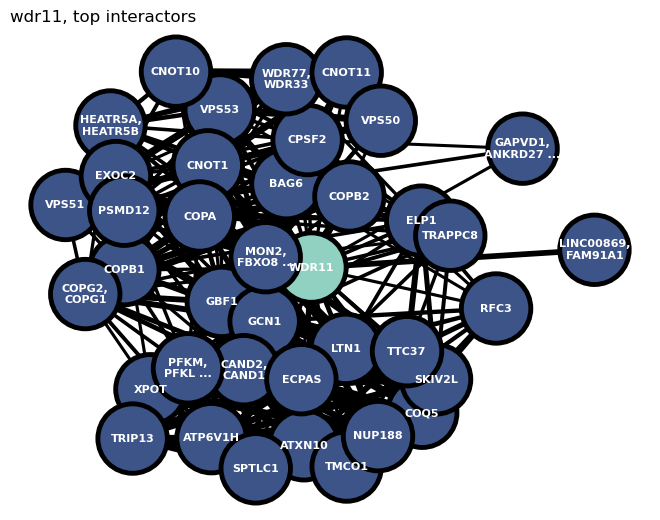

In [152]:
colors = ["#4DBBD5", "#E64B35", "#00A087", "#3C5488", "#F39B7F", "#8491B4", "#91D1C2", "#DC0000", "#7E6148", "#B09C85"]
#colors = ["#E64B35", "#4DBBD5", "#00A087", "#3C5488"]
protein_network = nx.Graph()
# add nodes with color attribute (discrete variable)
for i in hits:
    color = [colors[6] if i == og else colors[3]][0]
    gene = id_dict[i] 
    protein_network.add_node(gene, color=color)

# add edges with thickness attribute (continuous variable)
for i in range(len(ppi_nx)):
    p1 =  list(ppi_nx['fs'][i])[0]
    gene1 = id_dict[p1]
    p2 =  list(ppi_nx['fs'][i])[1]
    gene2 = id_dict[p2]
    weight = ppi_nx['ppi_score'][i]
    protein_network.add_edge(gene1, gene2, thickness=weight*5)

# extract node colors and edge thickness attributes
node_colors = [protein_network.nodes[node]["color"] for node in protein_network.nodes()]
edge_thickness = [protein_network.edges[edge]["thickness"] for edge in protein_network.edges()]

# draw the network using NetworkX with custom attributes
#pos = nx.arf_layout(protein_network)
#pos = nx.circular_layout(protein_network)
pos = nx.kamada_kawai_layout(protein_network)
# nx.draw(
#     protein_network, pos, with_labels=True, 
#     node_color=node_colors, node_size=2000, node_shape="o", linewidths=3.5, alpha=1,
#     font_size=8, font_weight="bold", 
#     edge_color="black", width=edge_thickness)

nx.draw(
    protein_network, pos,
    node_color=node_colors,  # Use the original node colors
    node_size=2500,  # Use the original node size
    node_shape="o",  # Node shape (circle)
    with_labels=True,
    alpha=1, 
    font_weight="bold", font_size=8,
    font_color="white",
    linewidths=3.5,
    edgecolors="black", width=edge_thickness
)

# add title
plt.title(f'{out_prefix}, top interactors', loc="left")

# save figure
plt.savefig(f"../ppi_ml/results/cmplx_files/special_cases/{out_prefix}_network.png", dpi=300)
plt.savefig(f"../ppi_ml/results/cmplx_files/special_cases/{out_prefix}_network.pdf", dpi=300)

# show the plot
plt.show()